# Explanatory Analysis

In [ ]:
from pathlib import Path
# Pfad zum Hauptordner
hauptordner_pfad = Path(r"C:\Users\Alex\Documents\GitHub\Project_plants\Data-Scientist-Project-Plant-Recognition-\01_data\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")
# Durchlaufe alle Unterordner und zähle die Dateien
list_dateien = {}
for unterordner in hauptordner_pfad.iterdir():
    if unterordner.is_dir():  # Überprüfe, ob es sich um einen Unterordner handelt
        anzahl_dateien = len(list(unterordner.glob('*')))  # Zähle alle Dateien im Unterordner
        print(f"Anzahl der Dateien im Unterordner '{unterordner.name}': {anzahl_dateien}")
        list_dateien[unterordner.name] = anzahl_dateien  # Speichere die Anzahl in der Liste
print(list_dateien)

# Speichere die Liste in einer Textdatei

Anzahl der Dateien im Unterordner 'Apple___Apple_scab': 2016
Anzahl der Dateien im Unterordner 'Apple___Black_rot': 1987
Anzahl der Dateien im Unterordner 'Apple___Cedar_apple_rust': 1760
Anzahl der Dateien im Unterordner 'Apple___healthy': 2008
Anzahl der Dateien im Unterordner 'Blueberry___healthy': 1816
Anzahl der Dateien im Unterordner 'Cherry_(including_sour)___healthy': 1826
Anzahl der Dateien im Unterordner 'Cherry_(including_sour)___Powdery_mildew': 1683
Anzahl der Dateien im Unterordner 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642
Anzahl der Dateien im Unterordner 'Corn_(maize)___Common_rust_': 1907
Anzahl der Dateien im Unterordner 'Corn_(maize)___healthy': 1859
Anzahl der Dateien im Unterordner 'Corn_(maize)___Northern_Leaf_Blight': 1908
Anzahl der Dateien im Unterordner 'Grape___Black_rot': 1888
Anzahl der Dateien im Unterordner 'Grape___Esca_(Black_Measles)': 1920
Anzahl der Dateien im Unterordner 'Grape___healthy': 1692
Anzahl der Dateien im Unterordner 'Gra

In [10]:
import pandas as pd
list_dateien_df = pd.DataFrame(list_dateien.items(), columns=['Unterordner', 'Anzahl Dateien'])
list_dateien_df["Unterordner"] = list_dateien_df["Unterordner"].str.replace(",", "_")  # Ersetze Unterstriche durch Leerzeichen
list_dateien_df["plant_name"]= list_dateien_df["Unterordner"].str.split("_").str[0]  # Extrahiere den Pflanzennamen
list_dateien_df["plant_status"] = list_dateien_df["Unterordner"].str.split("_").str[1:].str.join("_")  # Extrahiere den Pflanzestatus
list_dateien_df["plant_status"] = list_dateien_df["plant_status"].str.lstrip("_")

display(list_dateien_df.head(50))

plant_total = list_dateien_df.groupby("plant_name")["Anzahl Dateien"].sum().reset_index()  # Gruppiere nach Unterordner und summiere die Anzahl der Dateien

#print(list_dateien_df)

,Unterordner,Anzahl Dateien,plant_name,plant_status
0,Apple___Apple_scab,2016,Apple,Apple_scab
1,Apple___Black_rot,1987,Apple,Black_rot
2,Apple___Cedar_apple_rust,1760,Apple,Cedar_apple_rust
3,Apple___healthy,2008,Apple,healthy
4,Blueberry___healthy,1816,Blueberry,healthy
5,Cherry_(including_sour)___healthy,1826,Cherry,(including_sour)___healthy
6,Cherry_(including_sour)___Powdery_mildew,1683,Cherry,(including_sour)___Powdery_mildew
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1642,Corn,(maize)___Cercospora_leaf_spot Gray_leaf_spot
8,Corn_(maize)___Common_rust_,1907,Corn,(maize)___Common_rust_
9,Corn_(maize)___healthy,1859,Corn,(maize)___healthy


<Figure size 1200x600 with 0 Axes>

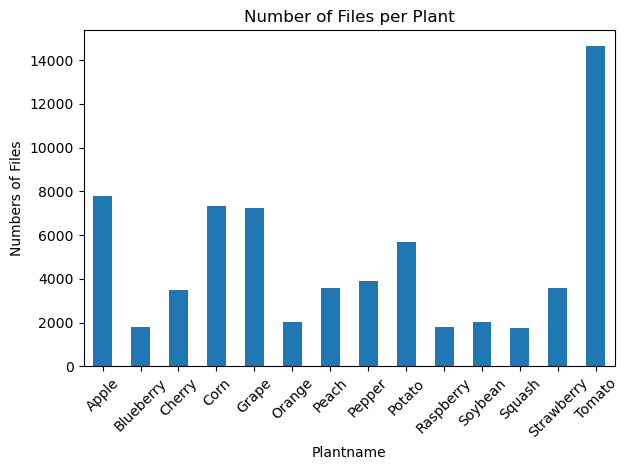

,plant_name,Anzahl Dateien
0,Apple,7771
1,Blueberry,1816
2,Cherry,3509
3,Corn,7316
4,Grape,7222
5,Orange,2010
6,Peach,3566
7,Pepper,3901
8,Potato,5702
9,Raspberry,1781


In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plant_total.plot(kind='bar', x='plant_name', y='Anzahl Dateien', legend=False)
plt.title('Number of Files per Plant')
plt.xlabel('Plantname')
plt.ylabel('Numbers of Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
display(plant_total)

,Unterordner,Anzahl Dateien,plant_name,plant_status
0,Apple___Apple_scab,2016,Apple,Apple_scab
1,Apple___Black_rot,1987,Apple,Black_rot
2,Apple___Cedar_apple_rust,1760,Apple,Cedar_apple_rust
3,Apple___healthy,2008,Apple,healthy
4,Blueberry___healthy,1816,Blueberry,healthy
5,Cherry_(including_sour)___healthy,1826,Cherry,(including_sour)___healthy
6,Cherry_(including_sour)___Powdery_mildew,1683,Cherry,(including_sour)___Powdery_mildew
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1642,Corn,(maize)___Cercospora_leaf_spot Gray_leaf_spot
8,Corn_(maize)___Common_rust_,1907,Corn,(maize)___Common_rust_
9,Corn_(maize)___healthy,1859,Corn,(maize)___healthy


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1200 with 0 Axes>

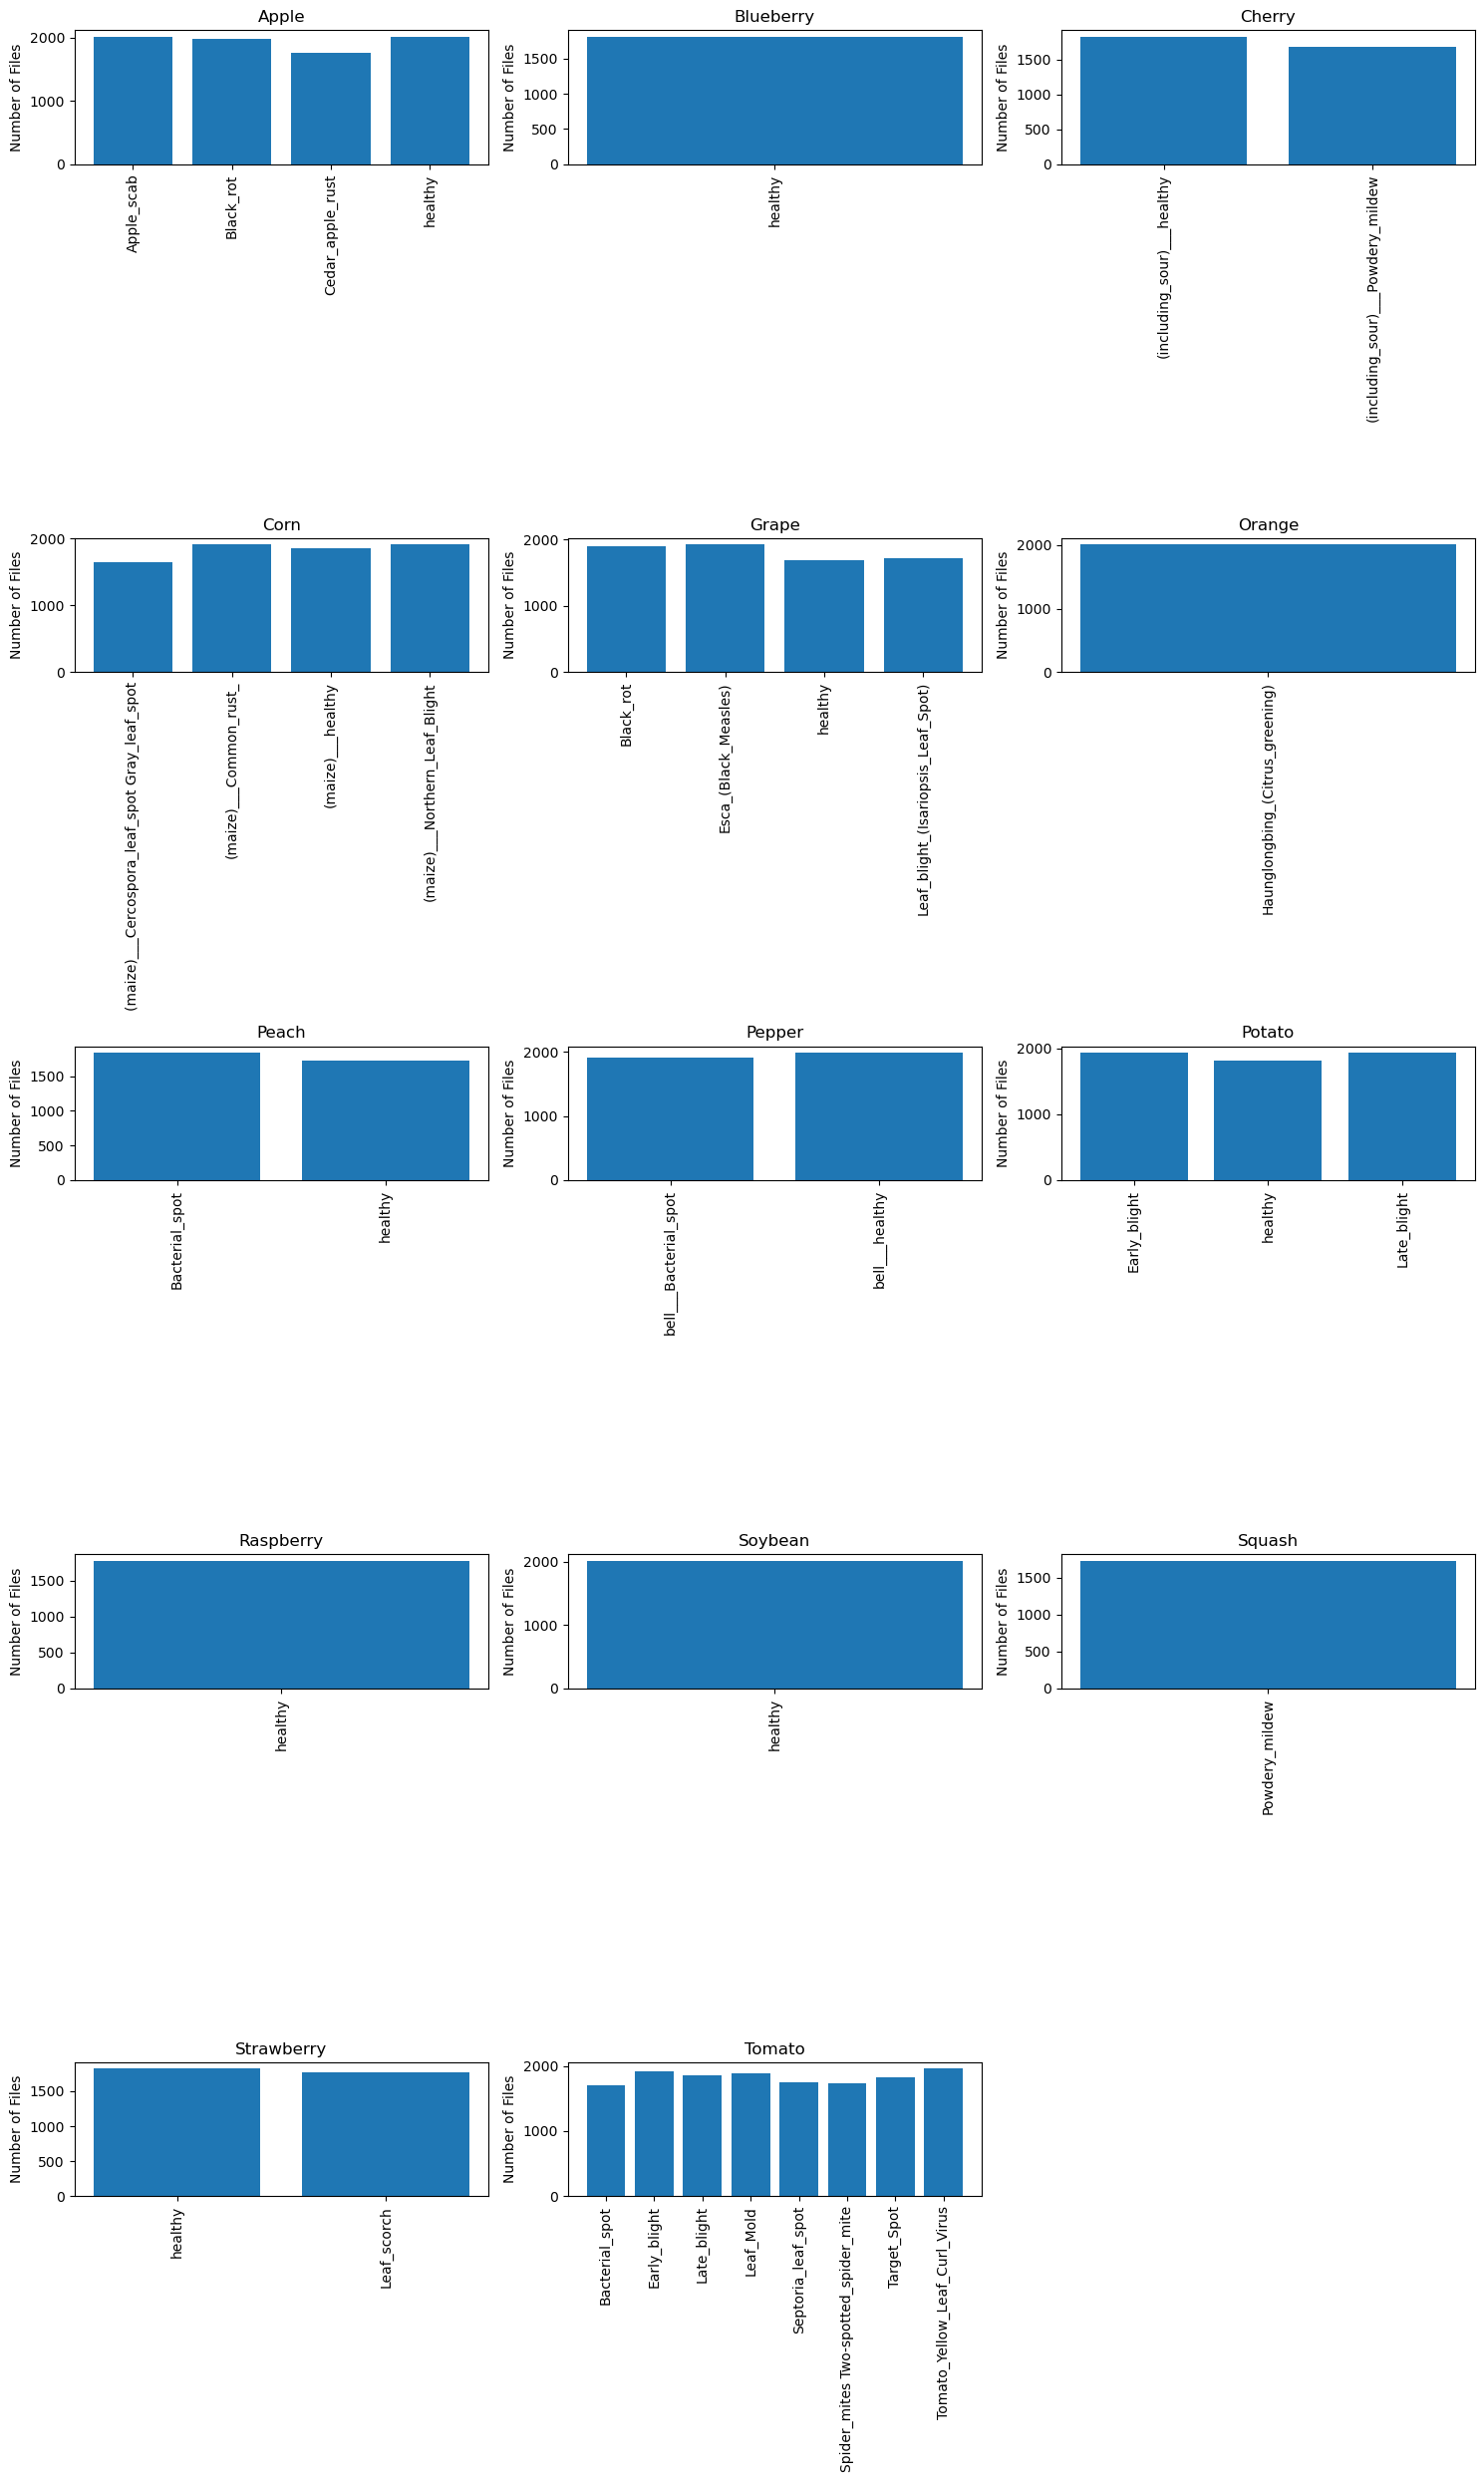

In [19]:
display(list_dateien_df)
plt.figure(figsize=(12, 12))
list_plant_names = list_dateien_df["plant_name"].unique()  # Extrahiere die einzigartigen Pflanzennamen

nrows = 5  # Anzahl der Zeilen für die Unterplots
max_plots_per_row = 3  # Maximale Anzahl der Plots pro Zeile 
fig, axes = plt.subplots(nrows=nrows, ncols=min(max_plots_per_row, len(list_plant_names)), figsize=(15, 5 * nrows))
axes = axes.flatten() if len(list_plant_names) > 1 else [axes]  # Flatten the axes array if there are multiple plots




for i, plant_name in enumerate(list_plant_names):
    ax = axes[i]
    plant_data = list_dateien_df[list_dateien_df["plant_name"] == plant_name]
    ax.bar(plant_data["plant_status"], plant_data["Anzahl Dateien"])
    ax.set_title(plant_name)
    #ax.set_xlabel('', loc="center")
    ax.set_ylabel('Number of Files')
    ax.tick_params(axis='x', rotation=90,)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show


<Figure size 1200x1200 with 0 Axes>

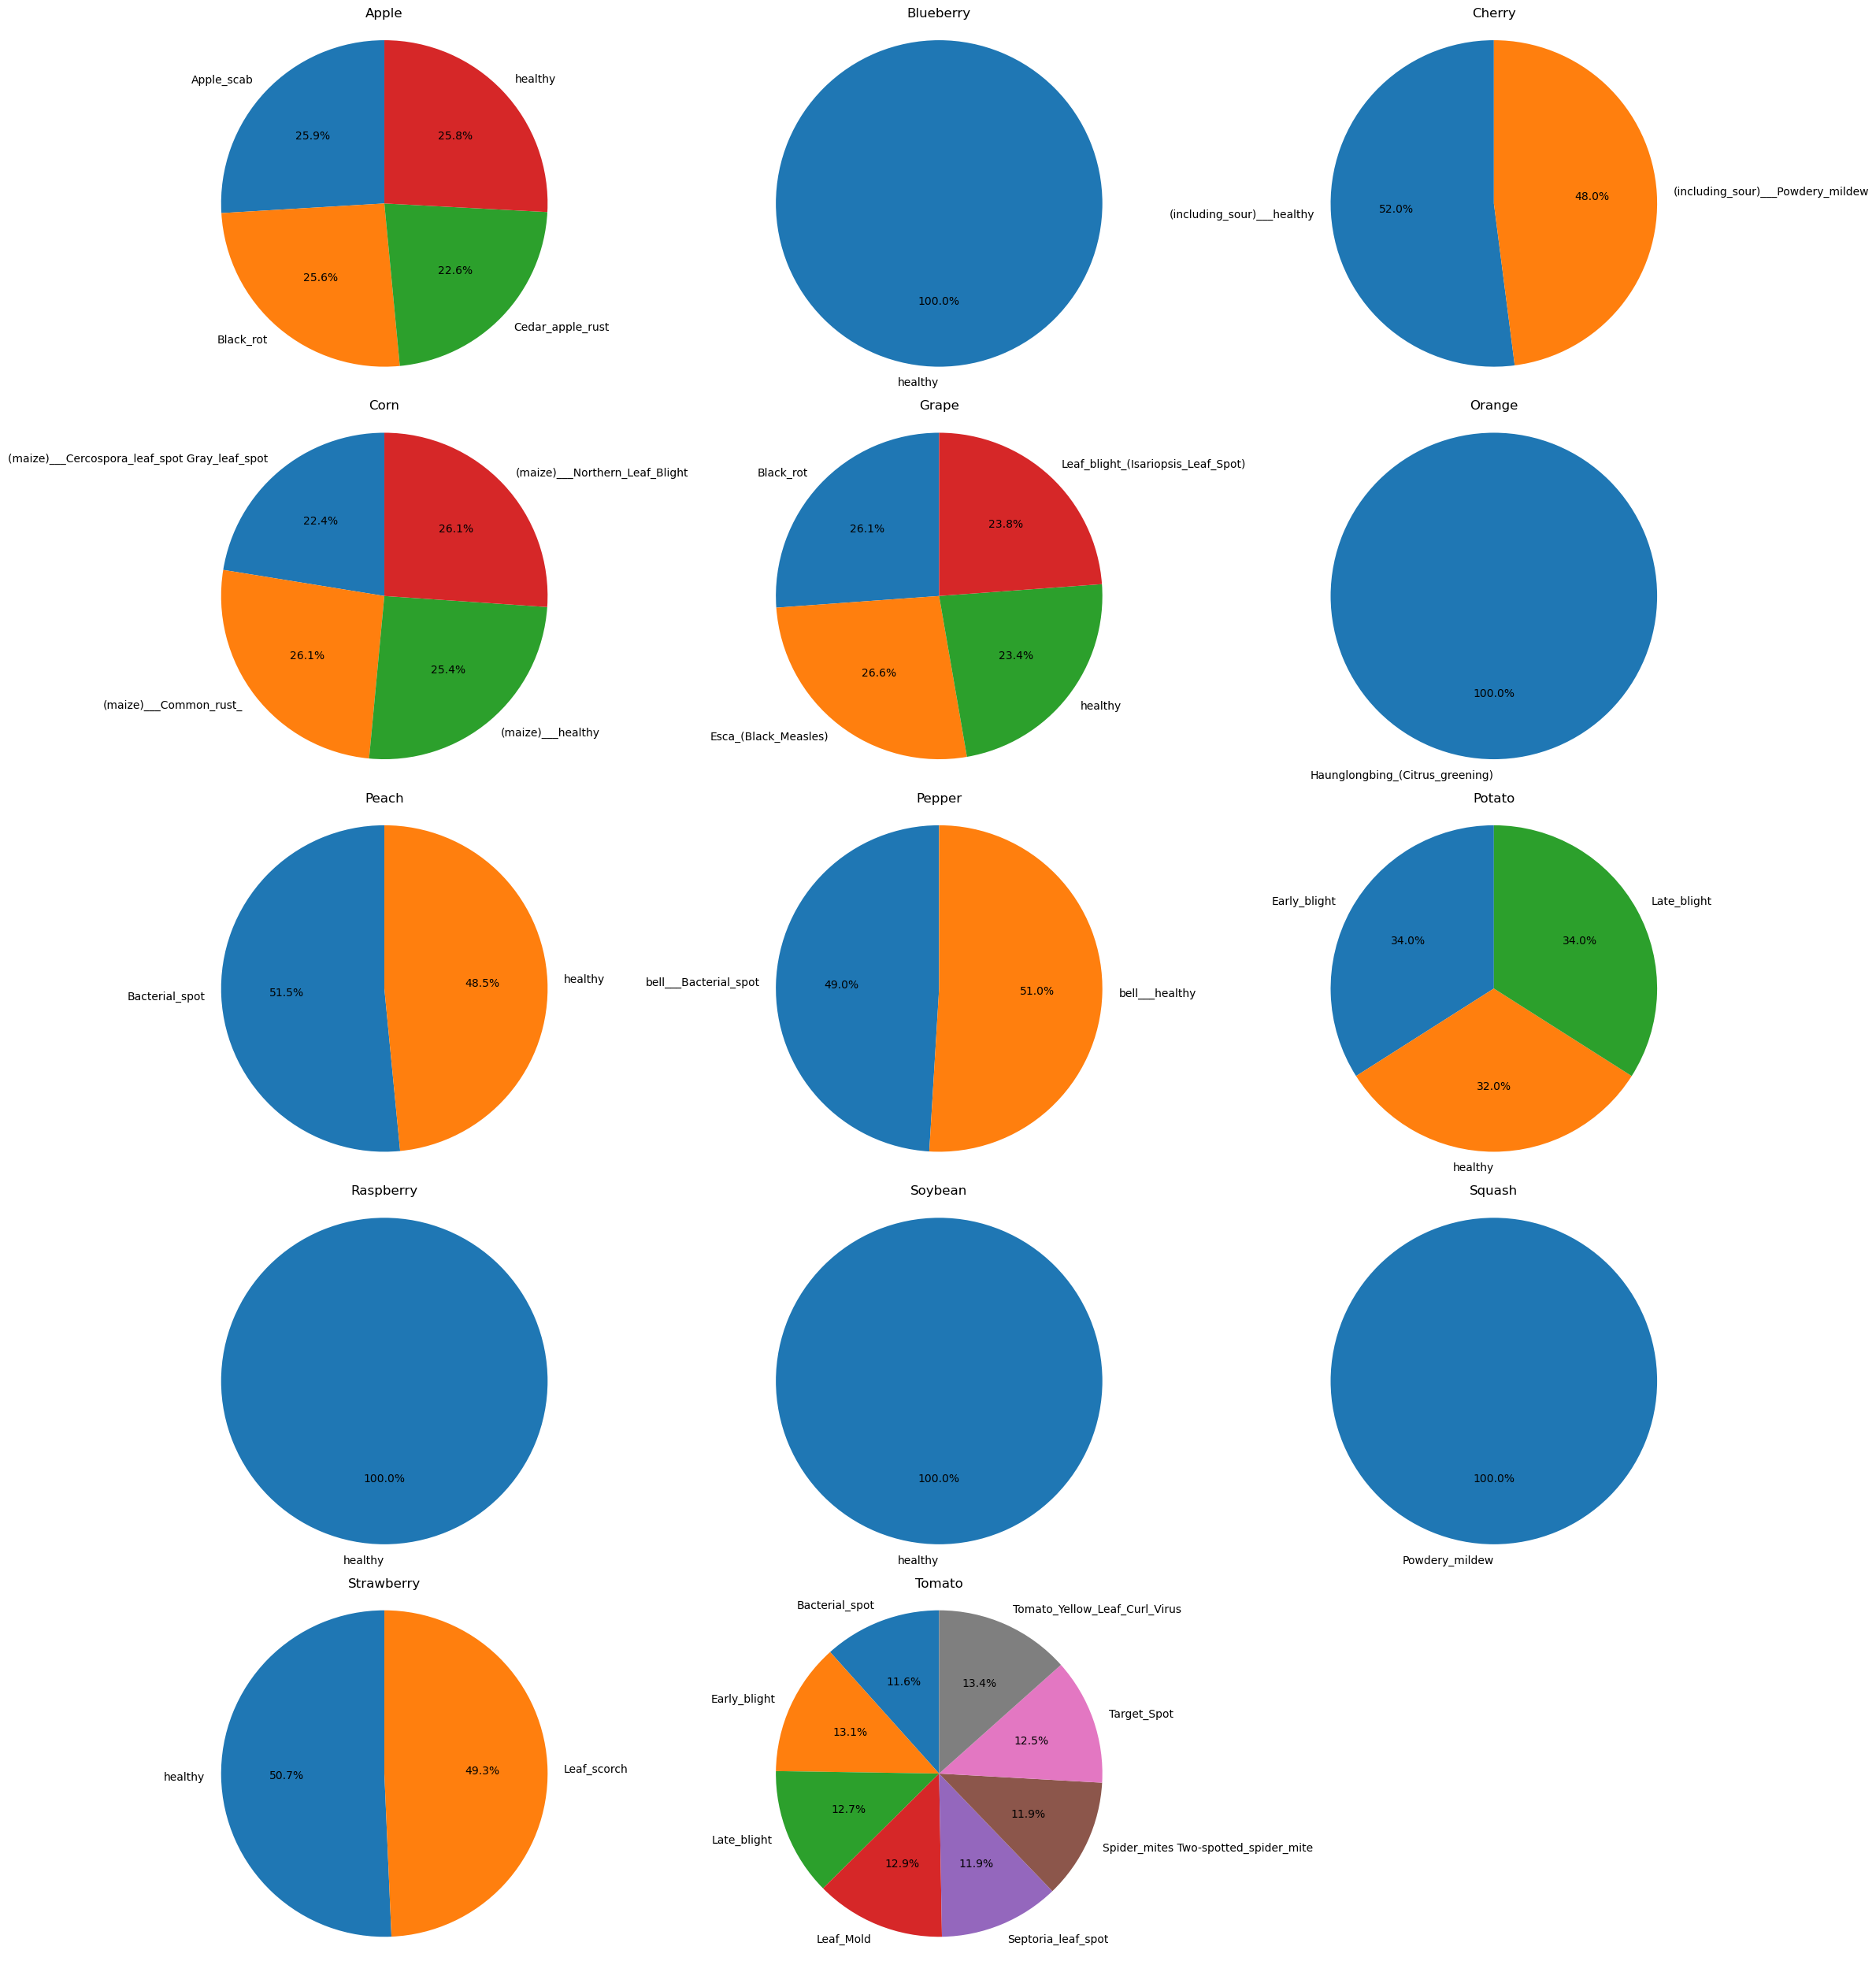

In [26]:
plt.figure(figsize=(12, 12))
list_plant_names = list_dateien_df["plant_name"].unique()  # Extrahiere die einzigartigen Pflanzennamen

nrows = 5  # Anzahl der Zeilen für die Unterplots
max_plots_per_row = 3  # Maximale Anzahl der Plots pro Zeile 
fig, axes = plt.subplots(nrows=nrows, ncols=min(max_plots_per_row, len(list_plant_names)), figsize=(23, 5 * nrows))
axes = axes.flatten() if len(list_plant_names) > 1 else [axes]  # Flatten the axes array if there are multiple plots

# Erstelle die Kreisdiagramme
for i, plant_name in enumerate(list_plant_names):
    ax = axes[i]
    plant_data = list_dateien_df[list_dateien_df["plant_name"] == plant_name]
    
    # Erstelle das Kreisdiagramm
    ax.pie(plant_data["Anzahl Dateien"], labels=plant_data["plant_status"], autopct='%1.1f%%', startangle=90)
    
    ax.set_title(plant_name)
    ax.axis('equal')  # Gleiches Seitenverhältnis für einen perfekten Kreis

# Entferne nicht verwendete Achsen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()